# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


     

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cidreira
Processing Record 2 of Set 1 | onguday
Processing Record 3 of Set 1 | mabaruma
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | ngaoundere
Processing Record 6 of Set 1 | nome
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | la gaulette
City not found. Skipping...
Processing Record 10 of Set 1 | huilong
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | gamba
Processing Record 13 of Set 1 | sa kaeo
Processing Record 14 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 15 of Set 1 | taoudenni
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | ola
Processing Record 18 of Set 1 | husavik
Processing Record 19 of Set 1 | kahului
Processing Record 20 of Set 1 | havoysund
Processing Record 21 of Set 1 | andenes
Processing Record 22 of Set 1 | mat

Processing Record 39 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 40 of Set 4 | luderitz
Processing Record 41 of Set 4 | oranjemund
Processing Record 42 of Set 4 | waddan
Processing Record 43 of Set 4 | broken hill
Processing Record 44 of Set 4 | mastic beach
Processing Record 45 of Set 4 | aklavik
Processing Record 46 of Set 4 | saleaula
City not found. Skipping...
Processing Record 47 of Set 4 | ponta do sol
Processing Record 48 of Set 4 | tazovskiy
Processing Record 49 of Set 4 | madimba
Processing Record 50 of Set 4 | grand-santi
Processing Record 1 of Set 5 | sandnessjoen
Processing Record 2 of Set 5 | hilo
Processing Record 3 of Set 5 | port-de-bouc
Processing Record 4 of Set 5 | wittmund
Processing Record 5 of Set 5 | jambi
Processing Record 6 of Set 5 | ouadda
Processing Record 7 of Set 5 | walvis bay
Processing Record 8 of Set 5 | virginia beach
Processing Record 9 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 10 of Set 5 | ramos ari

Processing Record 23 of Set 8 | pontes e lacerda
Processing Record 24 of Set 8 | trairi
Processing Record 25 of Set 8 | mahibadhoo
Processing Record 26 of Set 8 | andros
Processing Record 27 of Set 8 | les escoumins
Processing Record 28 of Set 8 | poum
Processing Record 29 of Set 8 | harper
Processing Record 30 of Set 8 | caceres
Processing Record 31 of Set 8 | podgornoye
Processing Record 32 of Set 8 | san pietro in casale
Processing Record 33 of Set 8 | kualakapuas
Processing Record 34 of Set 8 | kailua
Processing Record 35 of Set 8 | feni
Processing Record 36 of Set 8 | raudeberg
Processing Record 37 of Set 8 | doha
Processing Record 38 of Set 8 | laguna
Processing Record 39 of Set 8 | jaen
Processing Record 40 of Set 8 | taunggyi
Processing Record 41 of Set 8 | dera ghazi khan
Processing Record 42 of Set 8 | smithers
Processing Record 43 of Set 8 | chapais
Processing Record 44 of Set 8 | gonzalez
Processing Record 45 of Set 8 | touros
Processing Record 46 of Set 8 | sola
Processing

Processing Record 14 of Set 12 | marathon
Processing Record 15 of Set 12 | salalah
Processing Record 16 of Set 12 | itarema
Processing Record 17 of Set 12 | umm kaddadah
Processing Record 18 of Set 12 | kysyl-syr
Processing Record 19 of Set 12 | sur
Processing Record 20 of Set 12 | belebey
Processing Record 21 of Set 12 | maradi
Processing Record 22 of Set 12 | pangnirtung
Processing Record 23 of Set 12 | coos bay
Processing Record 24 of Set 12 | umm lajj
Processing Record 25 of Set 12 | chumikan
Processing Record 26 of Set 12 | lolua
City not found. Skipping...
Processing Record 27 of Set 12 | benguela
Processing Record 28 of Set 12 | omboue
Processing Record 29 of Set 12 | guarapari
Processing Record 30 of Set 12 | pilar
Processing Record 31 of Set 12 | kununurra
Processing Record 32 of Set 12 | mangrol
Processing Record 33 of Set 12 | manaus
Processing Record 34 of Set 12 | uthal
Processing Record 35 of Set 12 | katesh
Processing Record 36 of Set 12 | cravo norte
Processing Record 3

In [4]:

# Create the dataframe from the lists we generated from last cell
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,21.90,95,70,1.76,BR,2022-12-05 02:57:25
1,Onguday,50.7500,86.1500,-10.82,95,100,0.37,RU,2022-12-05 02:57:25
2,Mabaruma,8.2000,-59.7833,21.26,99,100,1.02,GY,2022-12-05 02:57:26
3,Hermanus,-34.4187,19.2345,14.19,76,11,1.86,ZA,2022-12-05 02:54:14
4,Ngaoundere,7.3167,13.5833,18.79,31,16,2.02,CM,2022-12-05 02:57:27
5,Nome,64.5011,-165.4064,1.17,98,100,14.49,US,2022-12-05 02:57:28
6,Rikitea,-23.1203,-134.9692,24.15,82,66,5.48,PF,2022-12-05 02:57:28
7,Ushuaia,-54.8000,-68.3000,5.81,65,40,4.63,AR,2022-12-05 02:55:01
8,Huilong,31.8111,121.6550,9.40,61,100,6.29,CN,2022-12-05 02:57:28
9,Arraial Do Cabo,-22.9661,-42.0278,22.63,90,100,12.73,BR,2022-12-05 02:57:29


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,21.90,95,70,1.76,BR,2022-12-05 02:57:25
1,Onguday,50.7500,86.1500,-10.82,95,100,0.37,RU,2022-12-05 02:57:25
2,Mabaruma,8.2000,-59.7833,21.26,99,100,1.02,GY,2022-12-05 02:57:26
3,Hermanus,-34.4187,19.2345,14.19,76,11,1.86,ZA,2022-12-05 02:54:14
4,Ngaoundere,7.3167,13.5833,18.79,31,16,2.02,CM,2022-12-05 02:57:27


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Cidreira,-30.1811,-50.2056,21.90,95,70,1.76,BR,2022-12-05 02:57:25
1,Onguday,50.7500,86.1500,-10.82,95,100,0.37,RU,2022-12-05 02:57:25
2,Mabaruma,8.2000,-59.7833,21.26,99,100,1.02,GY,2022-12-05 02:57:26
3,Hermanus,-34.4187,19.2345,14.19,76,11,1.86,ZA,2022-12-05 02:54:14
4,Ngaoundere,7.3167,13.5833,18.79,31,16,2.02,CM,2022-12-05 02:57:27


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

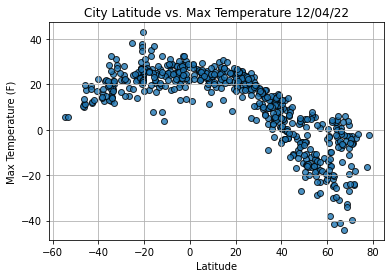

In [9]:
# Build scatter plot for latitude vs. temperature

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

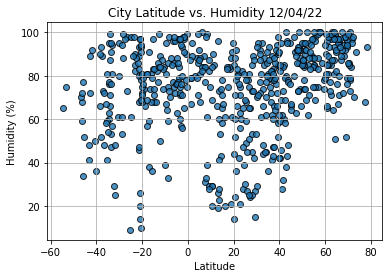

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

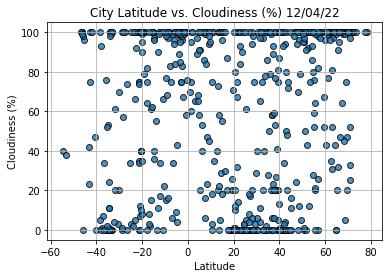

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

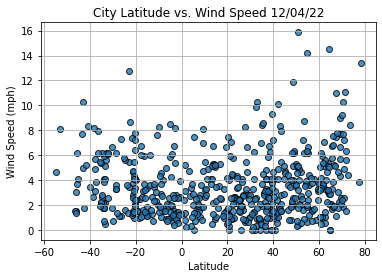

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def lnplot(x,y,xtext, ytext):
    plt.plot(x, y, 'o')
    slope, intercept, r, p, std_err = linregress(list(x),list(y))
    expected_y = [intercept + slope * i for i in list(x)]
    plt.plot(x, expected_y, color='red')
    ln_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(ln_eq, (0,10),fontsize=15, color='red')
    plt.xlabel(f'{xtext}')
    plt.ylabel(f'{ytext}')
    print(f'The r-value is : {r**2}')
    plt.show()


# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13


     

City                 Longyearbyen
Lat                       78.2186
Lng                       15.6401
Max Temp                    -2.09
Humidity                       93
Cloudiness                    100
Wind Speed                  13.38
Country                        SJ
Date          2022-12-05 02:57:30
Name: 13, dtype: object

In [46]:

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()


    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Onguday,50.7500,86.1500,-10.82,95,100,0.37,RU,2022-12-05 02:57:25
2,Mabaruma,8.2000,-59.7833,21.26,99,100,1.02,GY,2022-12-05 02:57:26
4,Ngaoundere,7.3167,13.5833,18.79,31,16,2.02,CM,2022-12-05 02:57:27
5,Nome,64.5011,-165.4064,1.17,98,100,14.49,US,2022-12-05 02:57:28
8,Huilong,31.8111,121.6550,9.40,61,100,6.29,CN,2022-12-05 02:57:28


In [47]:

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Cidreira,-30.1811,-50.2056,21.90,95,70,1.76,BR,2022-12-05 02:57:25
3,Hermanus,-34.4187,19.2345,14.19,76,11,1.86,ZA,2022-12-05 02:54:14
6,Rikitea,-23.1203,-134.9692,24.15,82,66,5.48,PF,2022-12-05 02:57:28
7,Ushuaia,-54.8000,-68.3000,5.81,65,40,4.63,AR,2022-12-05 02:55:01
9,Arraial Do Cabo,-22.9661,-42.0278,22.63,90,100,12.73,BR,2022-12-05 02:57:29


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.7048318359515744


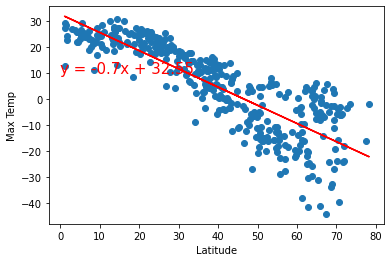

In [48]:
# Linear regression on Northern Hemisphere
lnplot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude', 'Max Temp')


The r-value is : 0.21456882716524028


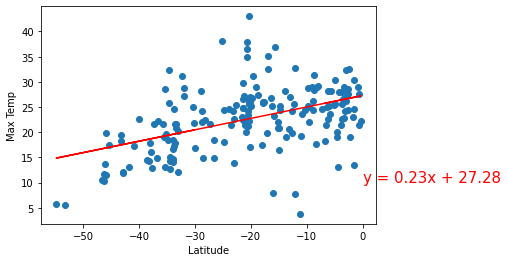

In [49]:
# Linear regression on Southern Hemisphere
lnplot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude', 'Max Temp')


  

**Discussion about the linear relationship: Latitude and maximum temperature have a significant negative correlation in the Northern Hemisphere.Latitude and maximum temperature exhibit a moderately positive correlation in the Southern Hemisphere.Both indicate that the maximum temperature will rise closer to zero at a latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.1565328283281366


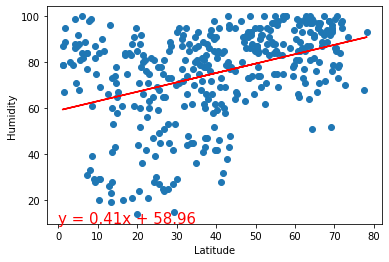

In [50]:

# Northern Hemisphere
lnplot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude', 'Humidity')



The r-value is : 0.06170184730917631


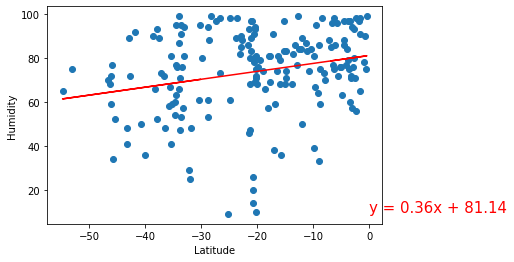

In [51]:

# Southern Hemisphere
lnplot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude', 'Humidity')



**Discussion about the linear relationship: The correlation between humidity and latitude is negligible in both the northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.06579795378171333


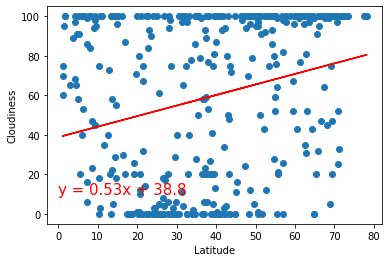

In [52]:
# Northern Hemisphere
lnplot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude', 'Cloudiness')


The r-value is : 0.0898580898219555


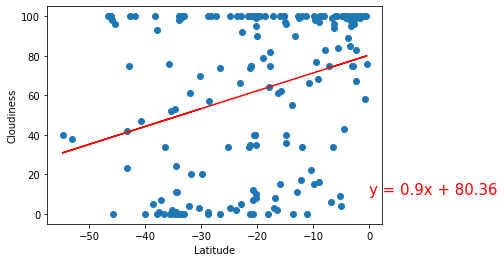

In [53]:
# Southern Hemisphere
lnplot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude', 'Cloudiness')


**Discussion about the linear relationship: The correlation between cloudiness and latitude is negligible in both the northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.06407781908179905


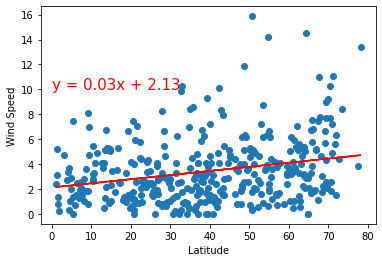

In [54]:
# Northern Hemisphere
lnplot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude', 'Wind Speed')



The r-value is : 0.07801393584413246


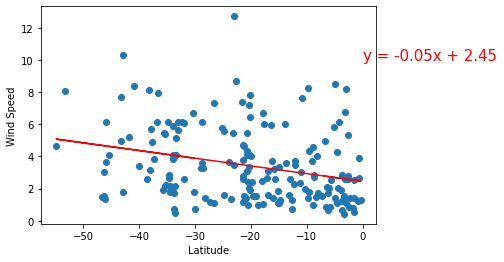

In [55]:
# Southern Hemisphere
lnplot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude', 'Wind Speed')


**Discussion about the linear relationship: The correlation between wind speed and latitude is negligible in both the northern and southern hemispheres.